# 1. Introduction

## 1.1 . Project Overview

For this project, I will use data cleaning, imputation, analysis and visualization to generate insights for a business stakeholder that wants to venture in the aviation field. 



## 1.2 . Business Problem

Our company is interested in purchasing and operating airplanes for commercial and private enterprises without any knowledge about the potential risks of aircraft. You are charged with determining which aircraft are at the lowest risk for the company to start this new business endeavour. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

## 1.3 . Business Understanding

A business stakeholder wants to venture into the Aircraft business without any knowledge about its risks. 
I want to help them in determining which aircrafts are at the lowest risk for the company to  to venture into the new business.


## 1.4 . Objectives

I want to help them in analyzing safety records and incident reports of various aircraft.
I want to help them in identifying the key risk factors and trends in aircraft safety.
By the end of this project I want to provide data-driven recommendations for aircraft selection.



# 2. Importing Python Libraries



In [373]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2.1 . Data Loading

In [374]:
df = pd.read_csv("AviationData.csv", encoding="ISO-8859-1", low_memory=False)

df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# 3. Data Analysis

In [375]:
# info to display the summary of the AviationData set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

This output means that there are 31 columns whose data type is displayed by(float64"the values are numbers" & object"values have both text+number"). It also displays the non-null values in each column and its memory usage

In [376]:
# Checking the shape of the dataset
df.shape

(88889, 31)

This output implies that there are 88889 ROWS and 31 COLUMNS

In [377]:
# generate the summary statistics for the dataframe
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


.describe() helps us to get a feel of our dataset when we start the Exploratory Data Analysis(EDA)process. For the above output, count helps us in checking the data completeness(checks for the non-null values in a dataset). The mean gives the average in each column. Min and max are the minimum and maximum values in each of those columns in the data set. Median(50%) and quartile values(25%&75%) for each clumn in the dataset.

# 4. Data Cleaning

In data cleaning, we clean data by;
 1. Dealing with duplicates
When working with datasets, duplicate values occur when the same row appears multiple times, either fully or partially. These duplicates can cause bias in analysis and lead to incorrect conclusions. Removing them is an essential step in data cleaning.
 
 2. Dealing with missing values
Dealing with missing values involves;
    
    -**Remove them** by dropping the offending row and/or columns        however we can lose data in the process. This strategy is          mostly valid for large datasets. 
    
    -**Replacing/Imputing**:
    For **continuous data**, the best method is to replace the missing value with the **median value** in the column since it influences the overall dataset distribution.
    For **categorical data**, you can replace the missing value with the most common value(**mode**) or **unknown**

In [378]:
#Checking for duplicated values
df.duplicated().value_counts()

False    88889
dtype: int64

Here, I was checking whether or not our dataset had duplicated values. In the output, it indicates false meaning there are no duplicated values

In [379]:
# Decting missing/null values
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [380]:
# check for the most common value
location_mode = df["Location"].mode()
country_mode = df["Country"].mode() 
airportname_mode = df["Airport.Name"].mode()
injurysev_mode = df["Injury.Severity"].mode()
aircraftdam_mode = df["Aircraft.damage"].mode()
reg_no_mode = df["Registration.Number"].mode()
make_mode = df["Make"].mode()
model_mode = df["Model"].mode()
purpose_flight_mode = df["Purpose.of.flight"].mode()
report_status_mode = df["Report.Status"].mode()
weather_cond_mode = df["Weather.Condition"].mode()
flight_phase_mode = df["Broad.phase.of.flight"].mode()

Since the column's data type is object, I want to find the mode and reassign to deal with the missing values

In [381]:
# replace with reassignment 
df["Country"] = df["Country"].fillna(country_mode[0])
df["Airport.Name"] = df["Airport.Name"].fillna(airportname_mode[0])
df["Injury.Severity"] = df["Injury.Severity"].fillna(injurysev_mode[0])
df["Aircraft.damage"] = df["Aircraft.damage"].fillna(aircraftdam_mode[0])
df["Registration.Number"] = df["Registration.Number"].fillna(reg_no_mode[0])
df["Make"] = df["Make"].fillna(make_mode[0])
df["Model"] = df["Model"].fillna(model_mode[0])
df["Purpose.of.flight"] = df["Purpose.of.flight"].fillna(purpose_flight_mode[0])
df["Report.Status"] = df["Report.Status"].fillna(report_status_mode[0])
df["Location"] = df["Location"].fillna(location_mode[0])
df["Weather.Condition"] = df["Weather.Condition"].fillna(weather_cond_mode[0])
df["Broad.phase.of.flight"] = df["Broad.phase.of.flight"].fillna(flight_phase_mode[0])

In [382]:
# recheck for missing value
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name                  0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         56602
Registration.Number           0
Make                          0
Model                         0
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight             0
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
Publication.Date          13771
dtype: i

In [383]:
# Replace with unknown

df["Aircraft.Category"] = df["Aircraft.Category"].fillna("Unknown")
df["Amateur.Built"] = df["Amateur.Built"].fillna("Unknown")
df["Engine.Type"] = df["Engine.Type"].fillna("Unknown")
df["Publication.Date"] = df["Publication.Date"].fillna("Unknown")
df["Airport.Code"] = df["Airport.Code"].fillna("Unknown")

Here I want to deal with the missing data by replacing them with Unknown since I dont eant to loose the data. 

In [384]:
# recheck for null values
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Latitude                  54507
Longitude                 54516
Airport.Code                  0
Airport.Name                  0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category             0
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines          6084
Engine.Type                   0
FAR.Description           56866
Schedule                  76307
Purpose.of.flight             0
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
Publication.Date              0
dtype: i

In [385]:
#dropping and reassigning

df["FAR.Description"] = df.drop("FAR.Description", axis=1)
df["Schedule"] = df.drop("Schedule", axis=1)
df["Air.carrier"] = df.drop("Air.carrier", axis=1)
df["Latitude"] = df.drop("Latitude", axis=1)
df["Longitude"] = df.drop("Longitude", axis=1)

Most of the columns above aren't in my objectives that's why I've chosen to drop. Similarly, they have a lot of missing values.

In [386]:
# recheck for the null values
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Latitude                      0
Longitude                     0
Airport.Code                  0
Airport.Name                  0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category             0
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines          6084
Engine.Type                   0
FAR.Description               0
Schedule                      0
Purpose.of.flight             0
Air.carrier                   0
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
Publication.Date              0
dtype: i

In [387]:
# numerical data, find median

total_fatal_median = df["Total.Fatal.Injuries"].median()
total_serious_median = df["Total.Serious.Injuries"].median()
total_minor_median = df["Total.Minor.Injuries"].median()
total_uninjured_median = df["Total.Uninjured"].median()
no_engines_median = df["Number.of.Engines"].median()

In [388]:
# replace with reassignment

df["Total.Fatal.Injuries"] = df["Total.Fatal.Injuries"].fillna(total_fatal_median)
df["Total.Serious.Injuries"] = df["Total.Serious.Injuries"].fillna(total_serious_median)
df["Total.Minor.Injuries"] = df["Total.Minor.Injuries"].fillna(total_minor_median)
df["Total.Uninjured"] = df["Total.Uninjured"].fillna(total_uninjured_median)
df["Number.of.Engines"] = df["Number.of.Engines"].fillna(df["Number.of.Engines"].median())


Since the column's data type is float64, median was the best method to deal with the missing values since it will influence the overall distribution of the data set.

In [389]:
# recheck for the null values
df.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
FAR.Description           0
Schedule                  0
Purpose.of.flight         0
Air.carrier               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

In [390]:
# summary of the cleaned data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88889 non-null  object 
 5   Country                 88889 non-null  object 
 6   Latitude                88889 non-null  object 
 7   Longitude               88889 non-null  object 
 8   Airport.Code            88889 non-null  object 
 9   Airport.Name            88889 non-null  object 
 10  Injury.Severity         88889 non-null  object 
 11  Aircraft.damage         88889 non-null  object 
 12  Aircraft.Category       88889 non-null  object 
 13  Registration.Number     88889 non-null  object 
 14  Make                    88889 non-null

In [391]:
#df.to_csv("AviatianData_Cleaned.csv",index = False)

# 5.Data Visualization

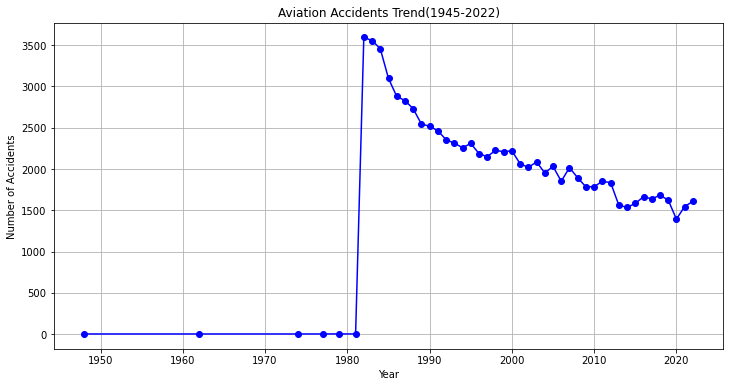

In [392]:
#accident trends over time

# Convert date column to datetime format (adjust column name if necessary)
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Extract the year
df['Year'] = df['Event.Date'].dt.year

# Count incidents per year
accidents_per_year = df['Year'].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(12,6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o', linestyle='-', color='blue')
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Aviation Accidents Trend(1945-2022)")
plt.grid(True)
plt.show();


The relationship between the number of accidents from 1945 to around 1980 has been stagnant over the years. The year 1981 has the highest number of accidents. Around 1982, the accident rates started dropping. Therefore, I t is safe for the buesiness stakeholders to venture into the aviation business

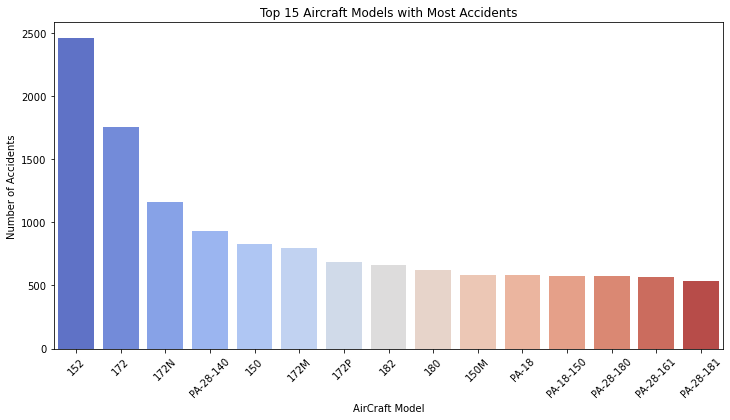

In [393]:
# identify the aircraft with the lowest accident rates

plt.figure(figsize=(12, 6))
sns.barplot(x=df['Model'].value_counts().index[:15],  
            y=df['Model'].value_counts().values[:15], 
            palette="coolwarm")

plt.xticks(rotation=45)
plt.xlabel("AirCraft Model")
plt.ylabel("Number of Accidents")
plt.title("Top 15 Aircraft Models with Most Accidents")
plt.show()

The 152 model is most common in Accidents with around 2400 number of accidents. Therefore, Stakeholders should avoid that model when purchasing. They instead choose the PA-28-181 model which has less than 1000 number of accidents 